# **Bloom Analysis - Mohonk_Herbs_Bloom**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 500)
import warnings
warnings.filterwarnings("ignore")

## Open file and load data

In [3]:
# download the csv file
herbs_mohonk = "https://drive.usercontent.google.com/download?id=1gKP7YlQeEiQ8ivgKbKdO8Ikivxd_oWUI&export=download&authuser=0&confirm=t&uuid=ada2dfc9-0576-414d-a185-e7f2ea2703d6&at=APZUnTWtLiEMLr_O__Z-14c-W4pq:1715038451287"
original_data = pd.read_csv(herbs_mohonk, encoding='latin1')

In [4]:
# presere a copy of the original data
df = original_data.copy()
# view the first five entries of the dataset
df = df.rename(columns = {'JD_First_Fls':'DOY'})
df.head()

,Common_Name,Scientific_Name,Year,DOY
0,agueweed,Gentiana_clausa,1979,235.0
1,agueweed,Gentiana_clausa,1994,270.0
2,agueweed,Gentiana_clausa,1995,248.0
3,agueweed,Gentiana_clausa,2004,274.0
4,agueweed,Gentiana_clausa,2007,266.0


In [5]:
df['Scientific_Name'] = df['Scientific_Name'].str.replace('\xa0', '_')

In [6]:
df.insert(0, 'Genus', df['Scientific_Name'].str.split('_').str[0])
df.insert(1, 'Species', df['Scientific_Name'].str.split('_').str[1])
df = df.drop(columns = 'Scientific_Name')

In [7]:
df['Species'] = df['Species'].fillna('')
df['Site_Name'] = 'Mohonk' #this is based on the assumption that the 'Mohonk Herbs' data comes from Mohonk, NY
df['State'] = 'NY'


In [8]:
df.head()

,Genus,Species,Common_Name,Year,DOY,Site_Name,State
0,Gentiana,clausa,agueweed,1979,235.0,Mohonk,NY
1,Gentiana,clausa,agueweed,1994,270.0,Mohonk,NY
2,Gentiana,clausa,agueweed,1995,248.0,Mohonk,NY
3,Gentiana,clausa,agueweed,2004,274.0,Mohonk,NY
4,Gentiana,clausa,agueweed,2007,266.0,Mohonk,NY


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genus        2445 non-null   object 
 1   Species      2445 non-null   object 
 2   Common_Name  2445 non-null   object 
 3   Year         2445 non-null   int64  
 4   DOY          2445 non-null   float64
 5   Site_Name    2445 non-null   object 
 6   State        2445 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 133.8+ KB


## Unique Genera

87 unique genera:
['Gentiana' 'Minuartia' 'Penstemon' 'Lotus' 'Solanum' 'Actaea' 'Silene'
 'Sanguinaria' 'Aralia' 'Iris' 'Clintonia' 'Sisyrinchium' 'Saponaria'
 'Cirsium' 'Linaria' 'Maianthemum' 'Lobelia' 'Chelidonium' 'Cichorium'
 'Tussilago' 'Aquilegia' 'Viola' 'Ranunculus' 'Potentilla' 'Bellis'
 'Taraxacum' 'Asclepias' 'Verbascum' 'Corydalis' 'Heracleum' 'Hesperis'
 'Dianthus' 'Panax' 'Solidago' 'Micranthes' 'Inula' 'Sorbaria' 'Polygala'
 'Alliaria' 'Zizia' 'Coptis' 'Euthamia' 'Anemone' 'Geranium' 'Lunaria'
 'Medeola' 'Arisaema' 'Coreopsis' 'Hemerocallis' 'Caltha' 'Mitella'
 'Vinca' 'Trillium' 'Pastinaca' 'Cardamine' 'Cypripedium' 'Lamium'
 'Antennaria' 'Pyrola' 'Houstonia' 'Daucus' 'Ambrosia' 'Trifolium'
 'Thalictrum' 'Rumex' 'Boechera' 'Galanthus' 'Polygonatum' 'Centaurea'
 'Trientalis' 'Epigaea' 'Erythronium' 'Echium' 'Ageratina' 'Melilotus'
 'Verbena' 'Oclemena' 'Lysimachia' 'Isotria' 'Monarda' 'Galium' 'Fragaria'
 'Eranthis' 'Achillea' 'Tragopogon' 'Barbarea' 'Hypoxis']


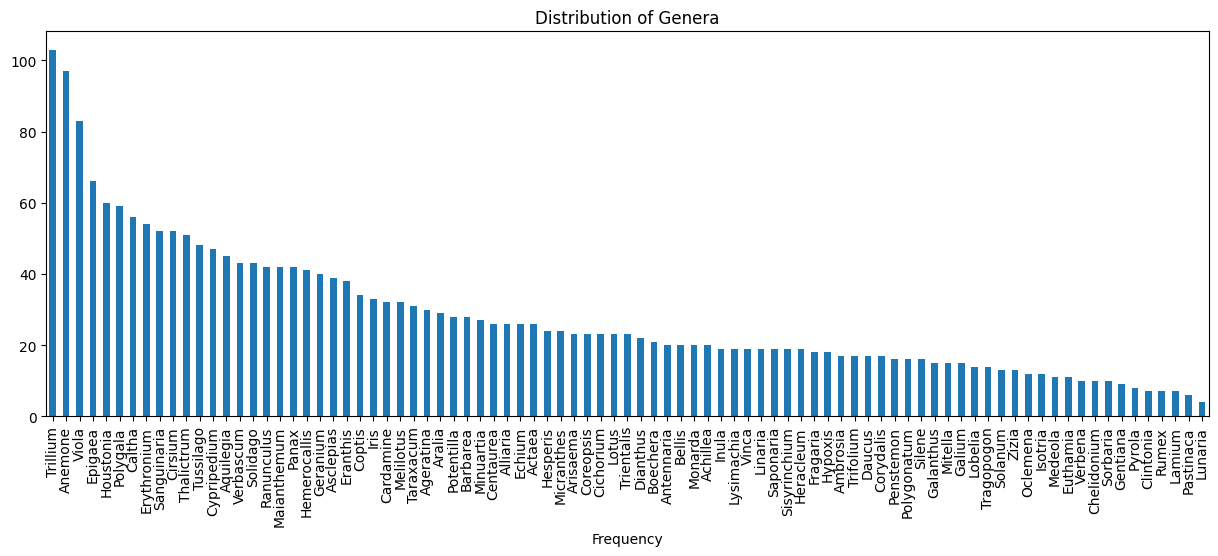

In [10]:
genus_list = df['Genus'].unique()

plt.figure(figsize = (15,5))
print(len(genus_list), 'unique genera:')
print(genus_list)
df['Genus'].value_counts().plot.bar()
plt.xlabel('Frequency')
plt.title('Distribution of Genera')
plt.show()

## Unique Species

98 unique species:
['clausa' 'groenlandica' 'digitalis' 'corniculatus' 'dulcamara' 'racemosa'
 'vulgaris' 'canadensis' 'hispida' 'versicolor' 'borealis' 'angustifolium'
 'officinalis' 'vulgare' 'canadense' 'arvense' 'cardinalis' 'majus'
 'intybus' 'farfara' 'sororia' 'acris' 'simplex' 'perennis' 'officinale'
 'syriaca' 'thapsus' '' 'maximum' 'matronalis' 'armeria' 'pubescens'
 'trifolius' 'juncea' 'virginiensis' 'helenium' 'racemosum' 'sorbifolia'
 'paucifolia' 'petiolata' 'aurea' 'trifolia' 'graminifolia' 'americana'
 'robertianum' 'annua' 'virginiana' 'triphyllum' 'abortivus' 'lanceolata'
 'lilioasphodelus' 'rostrata' 'palustris' 'blattaria' 'minor' 'fulva'
 'undulatum' 'sativa' 'pensylvanica' 'acaule' 'exaltata' 'amplexicaule'
 'neglecta' 'elliptica' 'caerulea' 'carota' 'psilostachya' 'pratense'
 'erectum' 'rotundifolia' 'thalictroides' 'acetosella' 'bicolor'
 'laevigata' 'nivalis' 'stoebe' 'blanda' 'repens' 'americanum' 'pachypoda'
 'altissima' 'albus' 'urticifolia' 'acuminata' 'qu

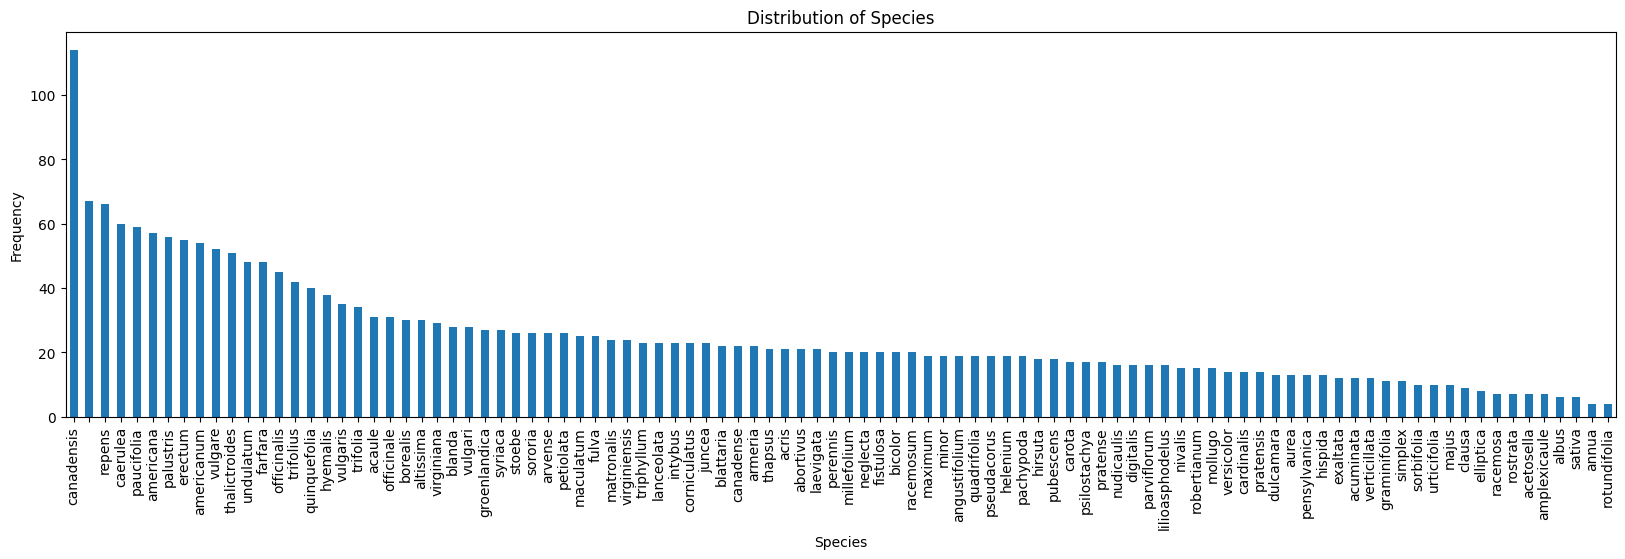

In [11]:
specie_list = df['Species'].unique()

print(len(specie_list), 'unique species:')
print(specie_list)

plt.figure(figsize=(20,5))
df['Species'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Species')
plt.show()

# Form groups based on unique combinations of genus, species, location

In [12]:
# create a new column to capture the categories the entry pertains to
categories = []
for ind in df.index:
  category = (df['Genus'][ind],df['Species'][ind], df['Site_Name'][ind], df['State'][ind])
  categories.append(category)
df['categories'] = categories

In [13]:
# view the new column
df.head()

,Genus,Species,Common_Name,Year,DOY,Site_Name,State,categories
0,Gentiana,clausa,agueweed,1979,235.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
1,Gentiana,clausa,agueweed,1994,270.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
2,Gentiana,clausa,agueweed,1995,248.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
3,Gentiana,clausa,agueweed,2004,274.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
4,Gentiana,clausa,agueweed,2007,266.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"


In [14]:
category_list = df.categories.unique()
print('There are',len(category_list),'unique cominations of genus, species, and site in the data')

There are 108 unique cominations of genus, species, and site in the data


## Map each group to the subset of data that it consists of

In [15]:
# create hash map to map unique categories to the data points falling into those categories
categorized_data = {}

# # for each category group observed in df, map the associated data to the category group
for category in category_list:


  criteria1 = df['Genus'] == category[0]
  criteria2 = df['Species'] == category[1]
  criteria3 = df['Site_Name'] == category[2]
  criteria4 = df['State'] == category[3]


  categorized_data.update({category:df[criteria1 & criteria2 & criteria3 & criteria4]})



## Visualize an Example

In [16]:
# enter search criteria
genus = 'Gentiana'
species = 'clausa'
site = 'Mohonk'
state = 'NY'

# view data associated with a given category group
example_data = categorized_data.get((genus, species, site, state))
example_data

,Genus,Species,Common_Name,Year,DOY,Site_Name,State,categories
0,Gentiana,clausa,agueweed,1979,235.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
1,Gentiana,clausa,agueweed,1994,270.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
2,Gentiana,clausa,agueweed,1995,248.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
3,Gentiana,clausa,agueweed,2004,274.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
4,Gentiana,clausa,agueweed,2007,266.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
5,Gentiana,clausa,agueweed,2008,307.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
6,Gentiana,clausa,agueweed,2010,253.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
7,Gentiana,clausa,agueweed,2012,242.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"
8,Gentiana,clausa,agueweed,2017,248.0,Mohonk,NY,"(Gentiana, clausa, Mohonk, NY)"


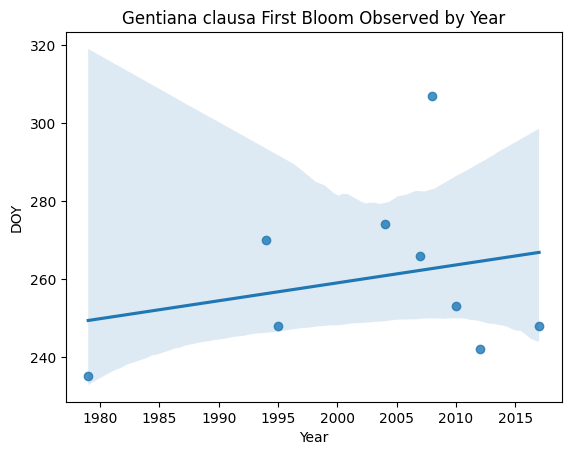

In [17]:
sns.regplot(example_data, x=example_data['Year'], y=example_data['DOY'])
plt.title(f'{genus} {species} First Bloom Observed by Year')
plt.show()

## Calculate Pearson correlation coefficient

In [18]:
x=example_data['Year']
y=example_data['DOY']

round(x.corr(y),4)

0.2451

# Perform regression and calculate relevant stats for all 108 unique groups

In [19]:
#create a list of the various category groups and a separte list of their respective correlations
category_groups = []
pearson_correlations = []
kendall_taus = []
regression_scores = []
slopes=[]
p_values = []
observations = []
results2 = []

# loop through all unique catgory groupings
for category in category_list:
  example_data = categorized_data.get(category)
  x=example_data['Year']   #reshape x data to work with sklearn linear model
  y=example_data['DOY']
  correlation = round(x.corr(y),4)
  tau, p_value = stats.kendalltau(x, y)


  #run the regression via statsmodel
  x = sm.add_constant(x)
  est = sm.OLS(y,x)
  est2 = est.fit()
  if len(est2.params) >= 2:
    slopes.append(round(est2.params[1],4))
  else:
    slopes.append(pd.NA)

  p_values.append(round(est2.pvalues[0],4))
  regression_scores.append(round(est2.rsquared,4))

  category_groups.append(category)
  pearson_correlations.append(correlation)
  kendall_taus.append(round(tau,4))
  observations.append(len(example_data['Year']))


correlation_df = pd.DataFrame({
    'dataset' : 'herbs_mohonk',
    'event' : 'bloom',
    'grouping':category_groups,
    'observations':observations,
    'Pearson r': pearson_correlations,
    'Kendall τ': kendall_taus,
    'slope':slopes,
    'R²' : regression_scores,
    'p-value':p_values
})


In [20]:
# drop all rows containing NaN values (these result from instances where there is only one DOY observation)
correlation_df = correlation_df.dropna()

# view and save the dataframe
correlation_df.to_csv('/content/drive/MyDrive/Projects/Bloom Project/stats/herbs_mohonk_stats.csv', index=False) #running this line requires that you mount your drive!
print(correlation_df.to_string())
print(len(correlation_df), 'total instances')

          dataset  event                                     grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
0    herbs_mohonk  bloom               (Gentiana, clausa, Mohonk, NY)             9     0.2451    -0.0282  0.4595  0.0601   0.6461
1    herbs_mohonk  bloom        (Minuartia, groenlandica, Mohonk, NY)            27    -0.5171    -0.2009 -0.9065  0.2674   0.0034
2    herbs_mohonk  bloom           (Penstemon, digitalis, Mohonk, NY)            16    -0.8718    -0.6156 -0.4227  0.7601   0.0000
3    herbs_mohonk  bloom            (Lotus, corniculatus, Mohonk, NY)            23    -0.4492    -0.2236 -0.6024  0.2018   0.0168
4    herbs_mohonk  bloom             (Solanum, dulcamara, Mohonk, NY)            13    -0.4712    -0.1700 -1.3736  0.2221   0.0871
5    herbs_mohonk  bloom               (Actaea, racemosa, Mohonk, NY)             7    -0.6493    -0.6190 -0.8357  0.4216   0.0862
6    herbs_mohonk  bloom               (Silene, vulgaris, Mohonk, NY)            16

In [21]:
correlation_df.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,108.0,22.638889,13.465399,4.0000,14.750000,19.00000,26.000000,66.0000
Pearson r,108.0,-0.428236,0.253383,-0.9388,-0.607500,-0.46305,-0.280700,0.2451
Kendall τ,108.0,-0.285291,0.189672,-0.9129,-0.407175,-0.27380,-0.189125,0.1952
slope,108.0,-0.363367,0.309457,-1.3736,-0.550000,-0.30400,-0.169500,0.4595
R²,108.0,0.246987,0.192440,0.0000,0.078825,0.21440,0.369050,0.8814
p-value,108.0,0.129194,0.240102,0.0000,0.001575,0.01545,0.096225,0.9881


### Restict observations to instances that saw a p-value < .05
#### Sorted by p-value


In [22]:
significant = correlation_df[correlation_df['p-value']<.05].sort_values('p-value')
print(significant.to_string())
print(len(significant), 'instances in total')

          dataset  event                                     grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
2    herbs_mohonk  bloom           (Penstemon, digitalis, Mohonk, NY)            16    -0.8718    -0.6156 -0.4227  0.7601   0.0000
72   herbs_mohonk  bloom              (Trillium, erectum, Mohonk, NY)            55    -0.5046    -0.3456 -0.1671  0.2547   0.0000
35   herbs_mohonk  bloom               (Panax, trifolius, Mohonk, NY)            42    -0.7247    -0.5343 -0.4244  0.5252   0.0000
63   herbs_mohonk  bloom            (Cypripedium, acaule, Mohonk, NY)            31    -0.6052    -0.3812 -0.2657  0.3662   0.0000
88   herbs_mohonk  bloom           (Ageratina, altissima, Mohonk, NY)            30    -0.6711    -0.5250 -1.1259  0.4503   0.0000
20   herbs_mohonk  bloom             (Tussilago, farfara, Mohonk, NY)            48    -0.7295    -0.5065 -0.5638  0.5321   0.0000
13   herbs_mohonk  bloom               (Cirsium, vulgare, Mohonk, NY)            26

### Descriptive Statistics of Instance with p-value < .05:

In [23]:
significant.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,70.0,25.142857,14.004436,4.0000,17.000000,21.00000,27.000000,66.0000
Pearson r,70.0,-0.557446,0.154073,-0.9388,-0.678900,-0.55670,-0.454100,-0.1608
Kendall τ,70.0,-0.365313,0.143315,-0.9129,-0.431975,-0.34635,-0.263775,-0.1210
slope,70.0,-0.448730,0.260745,-1.2283,-0.581775,-0.42435,-0.251275,-0.0782
R²,70.0,0.334136,0.171694,0.0259,0.206175,0.30990,0.460900,0.8814
p-value,70.0,0.009464,0.012731,0.0000,0.000475,0.00320,0.014225,0.0494


###Significant Instances with Positive Slope:

In [24]:
positive_slopes = significant[significant['slope']>0].sort_values('slope')
print(positive_slopes.sort_values('slope', ascending = False).to_string())

Empty DataFrame
Columns: [dataset, event, grouping, observations, Pearson r, Kendall τ, slope, R², p-value]
Index: []


### Descriptive Statistics of Positively Sloped Instances:

In [25]:
positive_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pearson r,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kendall τ,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slope,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R²,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p-value,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Significant Instances with Negative Slope:

In [26]:
negative_slopes = significant[significant['slope']<0].sort_values('slope')
print(negative_slopes.sort_values('slope').to_string())

          dataset  event                                     grouping  observations  Pearson r  Kendall τ   slope      R²  p-value
30   herbs_mohonk  bloom                    (Corydalis, , Mohonk, NY)            17    -0.6838    -0.5294 -1.2283  0.4675   0.0016
17   herbs_mohonk  bloom            (Lobelia, cardinalis, Mohonk, NY)            14    -0.6729    -0.2235 -1.1926  0.4528   0.0048
88   herbs_mohonk  bloom           (Ageratina, altissima, Mohonk, NY)            30    -0.6711    -0.5250 -1.1259  0.4503   0.0000
10   herbs_mohonk  bloom            (Clintonia, borealis, Mohonk, NY)             7    -0.7624    -0.4286 -0.9405  0.5813   0.0353
53   herbs_mohonk  bloom  (Hemerocallis, lilioasphodelus, Mohonk, NY)            16    -0.7166    -0.2034 -0.9245  0.5135   0.0009
1    herbs_mohonk  bloom        (Minuartia, groenlandica, Mohonk, NY)            27    -0.5171    -0.2009 -0.9065  0.2674   0.0034
11   herbs_mohonk  bloom    (Sisyrinchium, angustifolium, Mohonk, NY)            19

### Descriptive Statistics of Negatively Sloped Instances:

In [27]:
negative_slopes.describe().T

,count,mean,std,min,25%,50%,75%,max
observations,70.0,25.142857,14.004436,4.0000,17.000000,21.00000,27.000000,66.0000
Pearson r,70.0,-0.557446,0.154073,-0.9388,-0.678900,-0.55670,-0.454100,-0.1608
Kendall τ,70.0,-0.365313,0.143315,-0.9129,-0.431975,-0.34635,-0.263775,-0.1210
slope,70.0,-0.448730,0.260745,-1.2283,-0.581775,-0.42435,-0.251275,-0.0782
R²,70.0,0.334136,0.171694,0.0259,0.206175,0.30990,0.460900,0.8814
p-value,70.0,0.009464,0.012731,0.0000,0.000475,0.00320,0.014225,0.0494


### Positive/Negative Slope Count

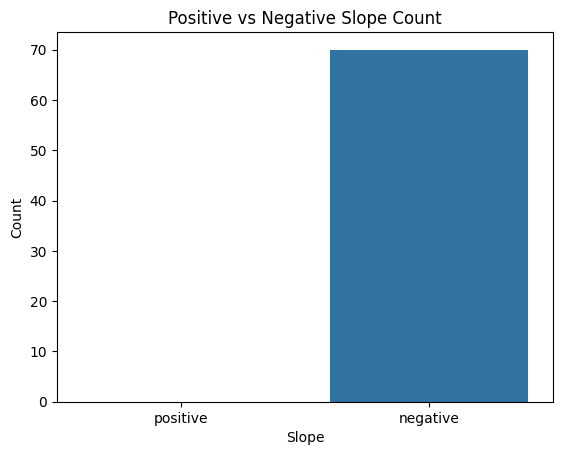

Number of positive slope examples: 0
Number of negative slope examples: 70


In [28]:
# Create a DataFrame
df = pd.DataFrame({
    'Array': ['positive', 'negative'],
    'Length': [len(positive_slopes), len(negative_slopes)]
})

# Create the plot
plot = sns.barplot(x='Array', y='Length', data=df)

# Set the title
plot.set_title('Positive vs Negative Slope Count')

# Set x and y-axis labels
plot.set_xlabel('Slope')
plot.set_ylabel('Count')

plt.show()

print('Number of positive slope examples:',len(positive_slopes))
print('Number of negative slope examples:',len(negative_slopes))

## 70, out of the original 108, groupings showed a statistically significant (p < .05) relationship between year and First_Yes_DOY


##0 have a positive slope
##70 have a negative slope